<font size=5> Imports </font>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

<font size=5> Reading Data </font>

In [66]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
df = df.replace('?', np.NaN)
df = df.dropna()
df = df[(df["SepalLengthCm"]>0) & (df["SepalWidthCm"]>0) &(df["PetalWidthCm"]>0) &(df["PetalLengthCm"]>0)]
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<font size="5">Data Visualization </font>

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

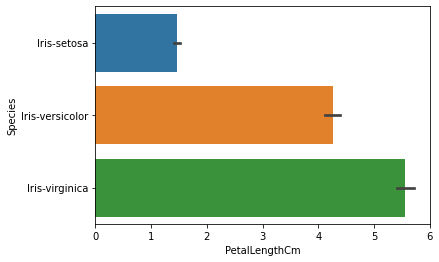

In [68]:
sns.barplot(df["PetalLengthCm"],df["Species"])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Species'>

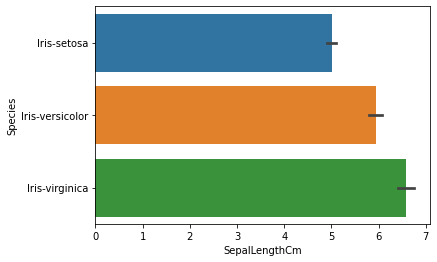

In [69]:
sns.barplot(df["SepalLengthCm"],df["Species"])

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

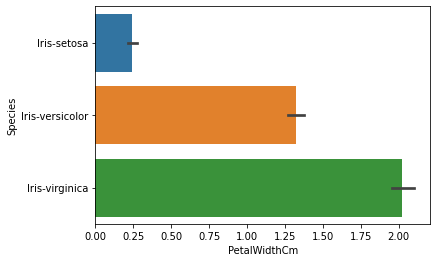

In [70]:
sns.barplot(df["PetalWidthCm"],df["Species"])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Species'>

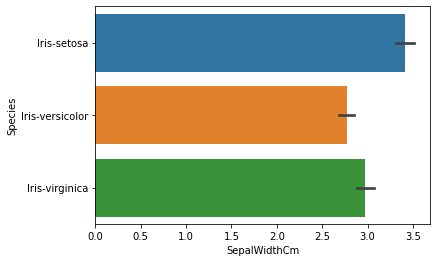

In [71]:
sns.barplot(df["SepalWidthCm"],df["Species"])

<font size="5">Error Correction</font>

<AxesSubplot:xlabel='PetalWidthCm'>

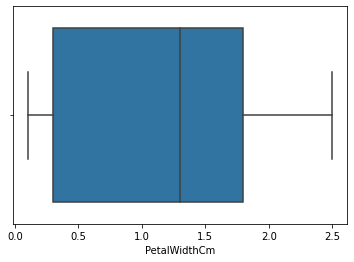

In [72]:
sns.boxplot(df["PetalWidthCm"])

In [73]:
Q1 = df["PetalWidthCm"].quantile(0.25)
Q3 = df["PetalWidthCm"].quantile(0.75)

In [74]:
iqr = Q3 - Q1
iqr

1.5

In [75]:
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

In [76]:
df = df[(df["PetalWidthCm"]<upper_limit) & (df["PetalWidthCm"]>lower_limit)]

<AxesSubplot:xlabel='PetalWidthCm'>

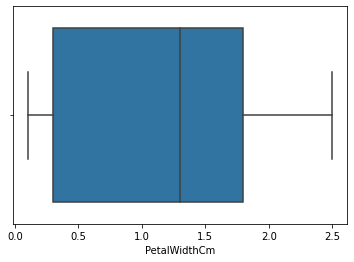

In [77]:
sns.boxplot(df["PetalWidthCm"])

<font size=5>Data Transformation</font>

In [78]:
types = df["Species"].unique()
types

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [79]:
df["Species"] = df["Species"].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], (0,1,2))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


<font size=5> Model Building </font>

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df["PetalWidthCm"], df["Species"], test_size=0.3)

In [81]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [82]:
reg = LogisticRegression().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

In [85]:
reg_pred = reg.predict(X_test)
nb_pred = nb.predict(X_test)

In [84]:
print("Accuracy of Logistic Regression : " , accuracy_score(reg_pred, y_test) * 100 , " %")
print("Accuracy of Naive Bayes : " , accuracy_score(nb_pred, y_test) * 100 , " %")

Accuracy of Logistic Regression :  97.77777777777777  %
Accuracy of Naive Bayes :  97.77777777777777  %
